<img src="http://allegatifac.unipv.it/sibal/file/Scrittasotto_Bianco.png" width="100" height="60" align="left">
<img src="https://s27389.pcdn.co/wp-content/uploads/2021/08/hottest-jobs-data-science-right-now-955x440.jpeg.optimal.jpeg" width="500" height="700" align="right">
<br><br><br><br><br><br>

# Covid-19 Italy trend
## Data analysis and prediction
<br><br>

forthebadge

[![forthebadge made-with-python](http://ForTheBadge.com/images/badges/made-with-python.svg)](https://www.python.org/)

![Made with Jupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)


<br>
<a><center>Started <span class="badge">24 Nov 2021</span></center></a>
<a><center>Updates <span class="badge">4</span></center></a>
<br><br><br><br>

#### Table of contents:
* [Introduction](#introduction)
* [Data visualization and analysis](#data_visualization_analysis)
* [Model selection](#model_selection)
* [Prediction](#prediction)
* [Conclusions](#conclusions)
<br><br>

### Introduction <a id='introduction'></a>

<font color="#8FC965"><em>“Without data you’re just another person with an opinion.”</em>–W. Edwards Deming</font>
<br><br>

**[Covid-19](https://www.who.int/health-topics/coronavirus#tab=tab_1) fourth wave it's close** in Italy, but how we can know when the situation starts to be critical?
<br>
Since past events we know that the growth is almost an exponential, when a wave starts, so we want to predict the future trend, with a **good model**, knowing *a priori* what's happening in previous days.
<br>
Building a good model is essential in order to **avoid** taking **bad decisions** (for example lockdown when not needed, or no restrictions when needed).
<br>
Obviously the prediction is really complicated, because a **lot of variables have to be take into account**.
<br>An example: the third vaccination may produce a decrease effect in future trend (especially deaths).
<br><br>
As you may understood by the previous lines, the aim of this project is finding a good model to predict future trend, using **statistical learning theory**.
<br><br>
All the data I am using are public and provided by the [Dipartimento della Protezione Civile (DPC)](https://www.protezionecivile.gov.it/it/).
<br>
You can also find the public data at this [github link](https://github.com/pcm-dpc/COVID-19).

In [1]:
# import all useful libraries
from datetime import date, timedelta, datetime
import ipywidgets as widgets
from ipywidgets import interact
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from patsy import cr
import random
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# set the same style for all the sliders
sliderStyle = {'description_width': 'initial', 'handle_color': 'green', 'text_color': 'white'}
# function in order to print the value of a slider
def printSliderValue(sliderName):
    print(str(sliderName))

# data import
df = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')

### Data visualization and analysis <a id='data_visualization_analysis'></a>

<font color="#8FC965"><em>“If we have data, let’s look at data. If all we have are opinions, let’s go with mine.”</em> – Jim Barksdale</font>
<br><br>

#### Data visualization

Before handling the problem of building a model, we want before visualize different trends in time, so for example the new positives trend or the deceases trend, and so on.
<br><br>
Firstly, lets see how data are organized in our dataframe, for example the first 5 rows.

In [2]:
# show how data are organized
df.head()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,...,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,...,4324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,...,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,...,9587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,...,12014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,...,15695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that some values are NaN, so we want to replace them with a 0 value.
<br>
This is a small part in what is also known as **data cleaning/wrangling**, that is one of the first steps in the whole data analysis process.

In [3]:
# Replace NaN with 0 values
df = df.fillna(0)

We may notice that the column names are written in italian, in order to make this understandable by everyone its a good thing to translate them in english.
<br>
So a function that translates the column names from italian to english and viceversa has been created. 
<br>
This one is called in lot of parts in the following code snippets.

In [4]:
# Create a dictionary that translates the name of the column in english
dictCol = {}
dictCol['Data'] = 'Date'
dictCol['Stato'] = 'State'
dictCol['Ricoverati con sintomi'] = 'Hospitalized with symptoms'
dictCol['Terapia intensiva'] = 'Intensive care unit'
dictCol['Totale ospedalizzati'] = 'Total hospitalized'
dictCol['Isolamento domiciliare'] = 'Home isolation'
dictCol['Totale positivi'] = 'Total positives'
dictCol['Variazione totale positivi'] = 'Total positives variation'
dictCol['Nuovi positivi'] = 'New positives'
dictCol['Dimessi guariti'] = 'Discharged healed'
dictCol['Deceduti'] = 'Deceased'
dictCol['Casi da sospetto diagnostico'] = 'Suspected diagnostic cases'
dictCol['Casi da screening'] = 'Cases from screening'
dictCol['Totale casi'] = 'Total cases'
dictCol['Tamponi'] = 'Swab tests'
dictCol['Casi testati'] = 'Cases tested'
dictCol['Note'] = 'Remarks'
dictCol['Ingressi terapia intensiva'] = 'Intensive care admissions'
dictCol['Note test'] = 'Test notes'
dictCol['Note casi'] = 'Cases notes'
dictCol['Totale positivi test molecolare'] = 'Total positive molecular test'
dictCol['Totale positivi test antigenico rapido'] = 'Total positive rapid antigen test'
dictCol['Tamponi test molecolare'] = 'Molecular test swabs'
dictCol['Tamponi test antigenico rapido'] = 'Rapid antigen test swabs'


# a function that returns column renamed, in english
def renameColName(colName):
    colName = colName.replace('_', ' ').capitalize()
    for nameIt, nameEn in dictCol.items():
        if nameIt == colName:
            return nameEn
        
        
# a function that returns original column name, in italian
def getOriginalColName(colName):
    for nameIt, nameEn in dictCol.items():
        if nameEn == colName:
            colName = nameIt
    return colName[0].lower() + colName.replace(' ', '_')[1:]


# get all the columns, renamed in english
colNames = []
for colName in df.columns:
    renamedCol = renameColName(colName)
    colNames.append(renamedCol) 

Through the next **widget items**, you are free to choose:
* Since when see data (default: 1 month before today)
* Which feature you're interested on seeing (default: *'new positives'* )
* See the data on a log scale (default: False)

In [5]:
# from which date you want to see data
# default = 1 month before today
ndaysDropdown = widgets.Dropdown(
    options=[('From the beginning', len(df)), ('One year', 365), ('Six months', 30*6), ('Three months', 30*3), ('Two months', 30*2), ('One month', 30), ('Two weeks', 7*2), ('One week', 7)],
    value=30,
    description='Since: ',
)
ndaysDropdown

Dropdown(description='Since: ', index=5, options=(('From the beginning', 648), ('One year', 365), ('Six months…

In [6]:
# select the data in dataset that are relative to the selected timelapse
ndays = ndaysDropdown.value
df_reduced = df[-ndays:]

# select a feature on which you want to see data
selectedFeatureDropdown = widgets.Dropdown(options=colNames, value='New positives', description='Select a feature:')
selectedFeatureDropdown

Dropdown(description='Select a feature:', index=8, options=('Date', 'State', 'Hospitalized with symptoms', 'In…

In [7]:
def applyLogScale(boolean):
    if(boolean == False):
        applyLogScaleButton = widgets.ToggleButton(value=False, description='Apply log scale', button_style='', tooltip='Description', icon='check')
    else:
        applyLogScaleButton = widgets.ToggleButton(value=True, description='Apply log scale', button_style='', tooltip='Description', icon='check')
    return applyLogScaleButton
applyLogScaleButton = applyLogScale(False)
applyLogScaleButton

ToggleButton(value=False, description='Apply log scale', icon='check', tooltip='Description')

In [8]:
# apply scala log scale on data, if user said so
if (applyLogScaleButton.value == True):
    y = np.log(df_reduced[getOriginalColName(selectedFeatureDropdown.value)])
else:
    y = df_reduced[getOriginalColName(selectedFeatureDropdown.value)]
x = df_reduced['data'][ : : ]
days = []
for day in x:
    days.append(day[: 10 : ])

Now that all this values have been chosen, you can see the selected features' actual trend (new positives - deaths - ...).

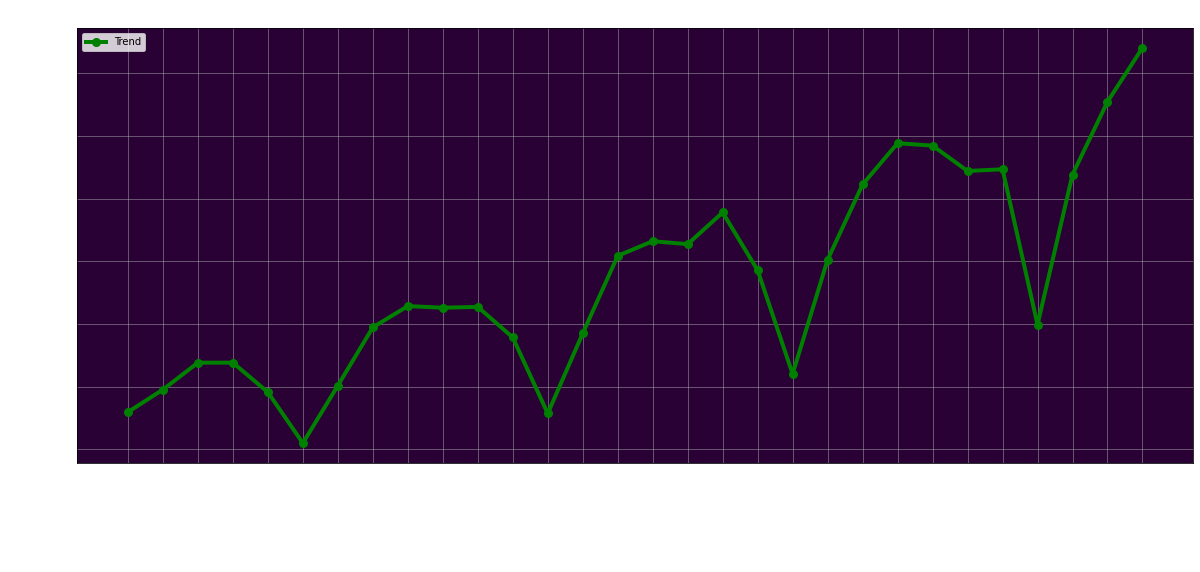

In [9]:
#plot selected data
plt.figure(figsize=(20,8))
ax = plt.axes()
ax.ticklabel_format(style='plain')
ax.set_facecolor('xkcd:very dark purple')
if (len(days) >= 100):
    plt.plot(y, color ='g', linewidth=4, label='Trend')
    # plotting moving average, one week
    plt.plot(y.rolling(window = 7).mean(), color='cornflowerblue', linewidth = 2, label='One week moving average')
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
else: 
    if (len(days) >= 80):
        plt.xticks(rotation=90, fontsize=9, color='w', label='Trend')
        # plotting moving average, one week
        plt.plot(days, y.rolling(window = 7).mean(), color='cornflowerblue', linewidth = 2, label='One week moving average')
        plt.plot(days, y, color ='g', linewidth=4)
    else:
        plt.xticks(rotation=90, fontsize=13, color='w')
        plt.plot(days, y, color ='g', linewidth=4, marker='o', markerfacecolor='g', markersize=8, label='Trend')
        if(len(days) > 30):
            # plotting moving average, one week
            plt.plot(days, y.rolling(window = 7).mean(), color='cornflowerblue', linewidth = 2, label='One week moving average')
plt.yticks(color='w', fontsize=14)
plt.grid(axis= 'x', alpha = 0.6)
plt.grid(axis= 'y', alpha = 0.6)
plt.tick_params(axis='x', color='w')
plt.tick_params(axis='y', color='w')
plt.xlabel('Day', fontsize=15, color='w')
plt.ylabel(selectedFeatureDropdown.value, fontsize=15, color='w')
plt.title(str(selectedFeatureDropdown.value) + ' in Italy, for each day', fontsize=20, color='w')
plt.legend()
plt.show()

#### Data analysis
<font color="#8FC965"><em>“Torture the data, and it will confess to anything.”</em>–Ronald Coase</font>
<br><br>
This part is very important, because we want to make an in-depth analysis through our data.
<br><br>
#### Basic properties
Even if at the first impact this table seems to be useless, it shows a general overview of our data, for example the number of day since the Covid-19 starts, the overall deaths.
<br><br>
Remember that all this data are related to Italy.

In [10]:
df.describe()

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,...,totale_casi,tamponi,casi_testati,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
count,648.00000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,6.480000e+02,648.000000,648.000000,...,6.480000e+02,6.480000e+02,6.480000e+02,648.000000,648.0,648.0,6.480000e+02,648.000000,6.480000e+02,6.480000e+02
mean,11454.24537,1348.461420,12802.708333,207747.652778,220550.350309,321.990741,7799.637346,1.993036e+06,77542.527778,86482.054012,...,2.291129e+06,3.981937e+07,1.686391e+07,53.719136,0.0,0.0,1.943405e+06,66063.165123,2.470195e+07,1.028911e+07
std,10584.47184,1275.717541,11839.411210,216083.506964,225899.604912,6748.967386,8485.375455,1.801317e+06,45133.535421,185155.353530,...,1.874868e+06,3.528896e+07,1.260730e+07,77.751903,0.0,0.0,2.013822e+06,76205.866391,2.601332e+07,1.398503e+07
min,101.00000,26.000000,127.000000,94.000000,221.000000,-51884.000000,78.000000,1.000000e+00,7.000000,0.000000,...,2.290000e+02,4.324000e+03,0.000000e+00,0.000000,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,2473.75000,282.250000,2817.750000,42164.250000,46744.500000,-2095.250000,1389.750000,2.007218e+05,35169.750000,0.000000,...,2.483715e+05,6.973642e+06,4.149153e+06,0.000000,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,5210.00000,580.000000,5875.500000,94996.500000,105615.500000,15.000000,4490.000000,1.663670e+06,80072.500000,0.000000,...,2.311150e+06,2.821240e+07,1.555316e+07,13.500000,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
75%,21379.75000,2520.500000,23803.000000,395585.750000,418507.500000,1969.250000,12886.750000,4.061104e+06,127341.000000,0.000000,...,4.255500e+06,7.043593e+07,2.926268e+07,82.250000,0.0,0.0,4.104574e+06,150845.250000,5.136696e+07,1.906897e+07
max,34697.00000,4068.000000,38507.000000,767867.000000,805947.000000,33418.000000,40902.000000,4.717556e+06,134003.000000,988470.000000,...,5.060430e+06,1.205850e+08,3.812960e+07,324.000000,0.0,0.0,4.849267e+06,211163.000000,6.757469e+07,5.301028e+07


##### Correlation matrix
An important analysis is to recognize if there are some relationship between the different dataset columns, for example deaths vs new daily positives.
<br>
This has been done by performing the [correlation matrix](https://www.displayr.com/what-is-a-correlation-matrix/), between all the different labels.

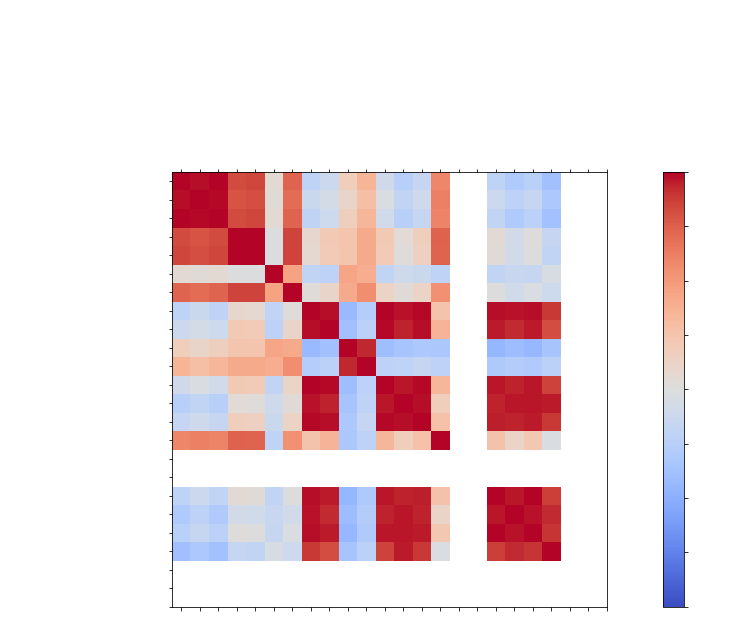

In [11]:
corrMatrix = df.corr()
fig = plt.figure(figsize=(20,8))
ax = plt.axes()
cax = ax.matshow(corrMatrix, cmap='coolwarm', vmin=-1, vmax=1)
color_bar = fig.colorbar(cax)                     
cbytick_obj = plt.getp(color_bar.ax.axes, 'yticklabels') 
plt.setp(cbytick_obj, color='w')
ticks = np.arange(0,len(colNames),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(colNames, color= 'w')
ax.set_yticklabels(colNames, color='w')
plt.show()

As first, is quite noticeable that the correlation matrix is simmetric (quite obviously).
<br><br>
More over: 
* the more the square color tends to be:
  * **darker red**, the higher the **positive correlation** between the two variables.
  * the more the square color tends to be **darker blue**, the higher the **negative correlation** between the two variables. 
  * **white** it means **no correlation**.
<br>

Some correlation coefficients are equal to 0.0, because some values initially have been NaN.
<br>
This is due to the fact that, for example, the molecular test swabs have been provided some months after the Covid-19 pandemic have been started.
<br><br>
Some of the observation that we can notice by the graph shown above:
* the more the data increases, the less the positive to intensive care unit admissions, new positives, total positive molecular test. 
<br> This is something that we can relate to the effects of vaxination to population...(so get vaxinated!)
* the more the new positives, the more the intensive care admissions
* the more the discharged healed, the more the deaths (can you understand why?)

You can also think about other correlation values and try to give a possible explanation.

### Model selection <a id='model_selection'></a>
<font color="#8FC965"><em>“All models are wrong, but some are useful.”</em>–George E.P. Box</font>
<br><br>

Every data scientist must keep in mind this quote, that somehow tries to say that no matter how hard you try to find a good model...reality will always be umpredictable.
In other words, there will always be a discrepance between the prediction and the real value.
<br>
Do not misunderstand, this doesn't means that try to building a model that explains your data is a wrong thing, the goal of every data scientist is trying to study data and reveal informations, insights that will be foundamental for **decision making process**.
<br>
An example: why and when start to think about possible restrictions? Why and when apply them? 
<br>
**Without data elaborations, so it means informations, you cannot take decisions.**
<br><br>
There are planty of techniques in order to find a model, but which one is the *"best"* one ?
Note that if you find a good model for a specific dataset it doesn't means that you find the best one for all possible applications...
<br>
Every dataset is different, so every model must be consistently too.
<br><br>
A good question, even before starting building the model is: 
* how many days do you want to use, to build your model?

In our case we do not want to explain the overall Covid-19 trend, of a specific feature, which in this specific case is new positives.
<br>
This is due to the fact that the trend has suffered of many variations, such as the temperature (during the colest months the covid-19 trend increases), the vaxinations, the lockdowns and so on.
<br>
So it means that instead of using all the data, which is something useless, a subset of them must be taken into account.
For a plenty of reasons, the data that we must consider cannot match with more than 30 days starting from today. 

In [12]:
# how many days do you want to use to build your model
# default = 1 month starting from today
ndaysSlider = widgets.IntSlider(value=30, min=1, max=len(df), description='N° model data:')
interact(printSliderValue, sliderName=ndaysSlider);

interactive(children=(IntSlider(value=30, description='N° model data:', max=648, min=1), Output()), _dom_class…

Because we can see that the actual trend is increasing exponentially is better if we work on a log-scale.
<br>
Obviously take particular attention of what finding a model working with log-scale means and differs by finding the same one with linear scale.
<br>
You can both chose to work with log scale, or linear scale, you're free.

In [13]:
applyLogScaleButton = applyLogScale(True)
applyLogScaleButton

ToggleButton(value=True, description='Apply log scale', icon='check', tooltip='Description')

Now we're ready to prepare our data, so that they can be used by next shown models.
<br>
In order to find model and evaluate performances of a model, or comparing performance between different models, [cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)) has been applied.
<br>
Our dataset has been devided into two different groups: training data and validation data. 
<br>
You can choose how to split data in validation and training (default: 25% validation, 75% training).
<br><br>
The index that we used to measure the performance, both in training, both in validation is the [R<sup>2</sup> score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html).
<br>

In [14]:
ndays = ndaysSlider.value
df_reduced = df[-ndays:]
train, validation = train_test_split(df_reduced, test_size=(25/100), random_state = 5)
train = train.sort_index()
validation = validation.sort_index()
xReal = np.arange(0, len(df_reduced), 1)
for x in xReal:
    xReal[x] = x + len(df) - len(df_reduced)
xTraining = np.asarray(train.index.tolist())
xValidation = np.asarray(validation.index.tolist())
allDays = []
trainDays = []
validationDays = []
for day in df_reduced['data']:
    allDays.append(((day[: 10 : ])))
for day in train['data']:
    trainDays.append((day[: 10 : ]))
for day in validation['data']:
    validationDays.append((day[: 10 : ]))    
if (applyLogScaleButton.value == True):
    yTraining = np.log(train[getOriginalColName(selectedFeatureDropdown.value)])
    yValidation = np.log(validation[getOriginalColName(selectedFeatureDropdown.value)])
    yReal = np.log(df_reduced[getOriginalColName(selectedFeatureDropdown.value)])
else:
    yTraining = train[getOriginalColName(selectedFeatureDropdown.value)]
    yValidation = validation[getOriginalColName(selectedFeatureDropdown.value)]
    yReal = df_reduced[getOriginalColName(selectedFeatureDropdown.value)]
xRealReshaped = xReal.reshape(-1, 1)
xTrainingReshaped = xTraining.reshape(-1, 1)
xValidationReshaped = xValidation.reshape(-1, 1)

#### Linear Regression

The first model is the easiest one, but this doesn't means it is useless. 
<br>
It may give us some partial idea of an easy model, nevertheless as we know [*“Reality is non-linear”*](https://medium.com/ipoetry/reality-is-non-linear-zen-b26b5b7f31c5).
<br>

Some ideas on how linear regression works are provided at this link: [Linear regression](https://en.wikipedia.org/wiki/Linear_regression).

In [15]:
linearRegressor = LinearRegression()
linearRegressor.fit(xTrainingReshaped, yTraining);
y_hat_Training = linearRegressor.predict(xTrainingReshaped)
y_hat_Validation = linearRegressor.predict(xValidationReshaped)

Here the results of the linear regressor, both in training and validation.

In [16]:
# Training
print('Training R^2 score: ' + str(round(r2_score(yTraining, y_hat_Training),3)))
# Validation
print('Validation R^2 score: ' + str(round(r2_score(yValidation, y_hat_Validation),3)))

Training R^2 score: 0.603
Validation R^2 score: 0.838


Through the following code lines it will be provided a plot that shows both the linear regressor, both the real data.

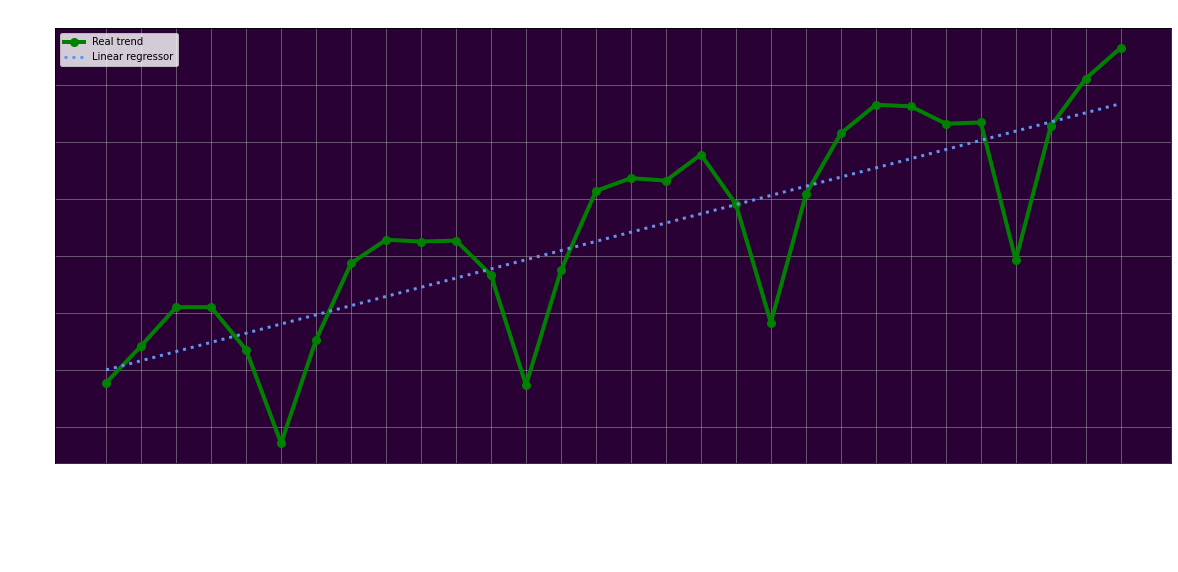

In [17]:
#plot selected data and model
plt.figure(figsize=(20,8))
ax = plt.axes()
ax.ticklabel_format(style='plain')
ax.set_facecolor('xkcd:very dark purple')
if (len(days) >= 100):
    plt.plot(xReal, yReal, color ='g', linewidth=4, label='Real trend')
    plt.plot(linearRegressor.predict(xRealReshaped), color='cornflowerblue', linewidth = 3, label='Linear regressor', linestyle=":")
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
else: 
    if (len(days) >= 80):
        plt.xticks(rotation=90, fontsize=9, color='w')
        plt.plot(allDays, yReal, color ='g', linewidth=4, label='Real trend')
        plt.plot(allDays, linearRegressor.predict(xRealReshaped), color='cornflowerblue', linewidth = 3, label='Linear regressor', linestyle=":")
    else:
        plt.xticks(rotation=90, fontsize=13, color='w')
        plt.plot(allDays, yReal, color ='g', linewidth=4, marker='o', markerfacecolor='g', markersize=8, label='Real trend')
        plt.plot(allDays, linearRegressor.predict(xRealReshaped), color='cornflowerblue', linewidth = 3, label='Linear regressor', linestyle=":")
plt.yticks(color='w', fontsize=14)
plt.grid(axis= 'x', alpha = 0.6)
plt.grid(axis= 'y', alpha = 0.6)
plt.tick_params(axis='x', color='w')
plt.tick_params(axis='y', color='w')
plt.xlabel('Day', fontsize=15, color='w')
plt.ylabel(selectedFeatureDropdown.value, fontsize=15, color='w')
plt.title(str(selectedFeatureDropdown.value) + ' in Italy, for each day', fontsize=20, color='w')
plt.legend()
plt.show()

#### Polynomial Regression
<br>
Now that we understood how the easies model works, how if we complicate it just a little, thinking about a polynomial model that fits our data?

But how many polynomial therms must we use?
<br>
This problem is the so-called [overfitting](https://www.investopedia.com/terms/o/overfitting.asp), so it means that if we use too many therms the model will exactly fit the real data, so we have find a model that fits also the noise, not only the real trend.
<br>
Something similar happens if we use few regressors. This issue is known as [underfitting](https://www.ibm.com/cloud/learn/underfitting).
<br>
In this case, the ideal number should be less then 6 and higher than 1 (viceversa we still talking about linear regression).
<br>

Some ideas on how polynomial regression works are provided at this link: [Polynomial regression](https://en.wikipedia.org/wiki/Polynomial_regression).

In [18]:
# Choose the number of regressor, for the polynomial
nregressorSlider = widgets.IntSlider(value=3, min=2, max=15, description='N° regressors:')
interact(printSliderValue, sliderName=nregressorSlider);

interactive(children=(IntSlider(value=3, description='N° regressors:', max=15, min=2), Output()), _dom_classes…

We've choose a value of 3 regressors because during a month there may be some inversion in the trend, so it means that it may increase-decrease-increase...
<br>
The phenomenon that during Mondays, the trend suddenly decreases doesn't means that the Covid-19 during Sundays takes a nap (data provided are 1 day delayed). 
<br>
This is due to the fact that less swabs are done on people, but still the Mondays data following the previous days trend.
<br><br>
Now we are interested on building the polynomial model, given the regressors number.

In [19]:
polyRegressor = np.poly1d(np.polyfit(xTraining, yTraining, nregressorSlider.value))

Here are shown the results of our model.
<br>
As we can see the test error decreases if we increase the number of regressors, but this is not what exactly happens on validation.
<br>
Our goal is not trying to follow exactly test data, but create a model that generalize our real trend.
<br>
The cross-validation is something that tries to reduce the overfitting problem, so in this case the best number of regressor is 3.
<br>

In [20]:
# Training
print('Training R^2 score: ' + str((round(r2_score(yTraining, polyRegressor(xTraining)),3))))
# Validation
print('Validation R^2 score: ' + str((round(r2_score(yValidation, polyRegressor(xValidation)),3))))

Training R^2 score: 0.609
Validation R^2 score: 0.766


Now we'll show in a graph both the obtained polynomial model, both the real trend.

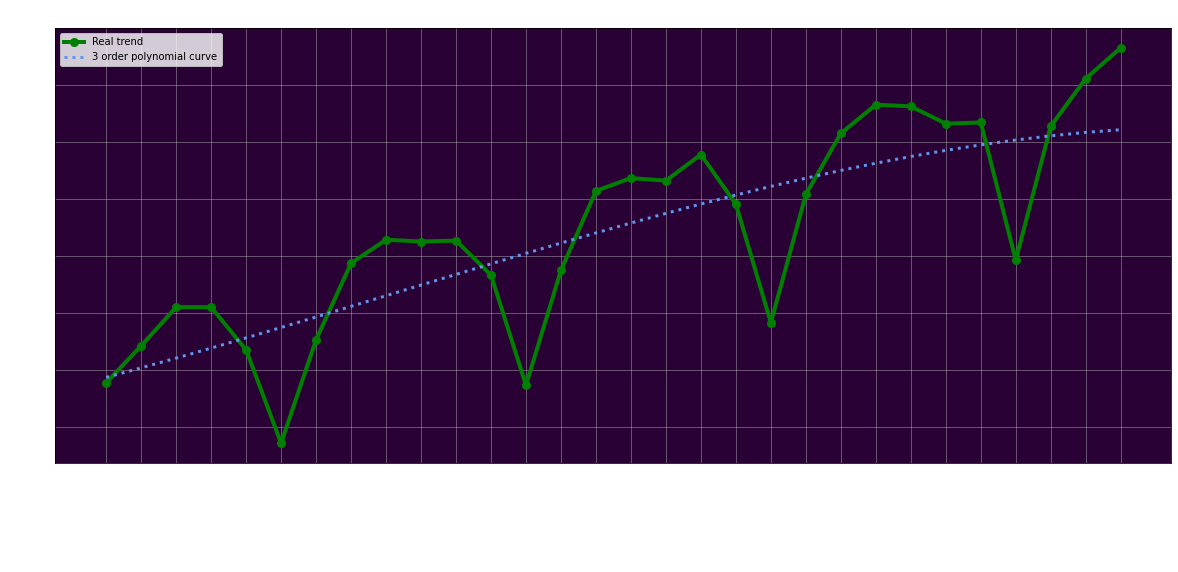

In [21]:
#plot selected data and model
plt.figure(figsize=(20,8))
ax = plt.axes()
ax.ticklabel_format(style='plain')
ax.set_facecolor('xkcd:very dark purple')
if (len(days) >= 100):
    plt.plot(xReal, yReal, color ='g', linewidth=4, label='Real trend')
    plt.plot(polyRegressor(xReal), color='cornflowerblue', linewidth = 3, label=f'{nregressorSlider.value} order polynomial curve', linestyle=":")
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
else: 
    if (len(days) >= 80):
        plt.xticks(rotation=90, fontsize=9, color='w')
        plt.plot(allDays, yReal, color ='g', linewidth=4, label='Real trend')
        plt.plot(allDays, polyRegressor(xReal), color='cornflowerblue', linewidth = 3, label=f'{nregressorSlider.value} order polynomial curve', linestyle=":")
    else:
        plt.xticks(rotation=90, fontsize=13, color='w')
        plt.plot(allDays, yReal, color ='g', linewidth=4, marker='o', markerfacecolor='g', markersize=8, label='Real trend')
        plt.plot(allDays, polyRegressor(xReal), color='cornflowerblue', linewidth = 3, label=f'{nregressorSlider.value} order polynomial curve', linestyle=":")
plt.yticks(color='w', fontsize=14)
plt.grid(axis= 'x', alpha = 0.6)
plt.grid(axis= 'y', alpha = 0.6)
plt.tick_params(axis='x', color='w')
plt.tick_params(axis='y', color='w')
plt.xlabel('Day', fontsize=15, color='w')
plt.ylabel(selectedFeatureDropdown.value, fontsize=15, color='w')
plt.title(str(selectedFeatureDropdown.value) + ' in Italy, for each day', fontsize=20, color='w')
plt.legend()
plt.show()

#### Lasso regression

Lasso regression is a type of linear regression that uses [shrinkage](https://www.statisticshowto.com/shrinkage-estimator/).
<br>
Shrinkage is where data values are shrunk towards a central point, like the mean.
<br>
The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).
<br>
This particular type of regression is well-suited for models showing high levels of [muticollinearity](https://en.wikipedia.org/wiki/Multicollinearity) or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

Some ideas on how lasso regression works are provided at this link: [Lasso regression](https://en.wikipedia.org/wiki/Lasso_(statistics)).

In [22]:
alphaL=1
lassoRegressor = Lasso(alphaL)
lassoRegressor.fit(xTrainingReshaped, yTraining);
y_hat_Training = lassoRegressor.predict(xTrainingReshaped)
y_hat_Validation = lassoRegressor.predict(xValidationReshaped)

Here are provided the results of the lasso regression.
<br>

In [23]:
# Training
print('Training R^2 score: ' + str(round(r2_score(yTraining, y_hat_Training),3)))
# Validation
print('Validation R^2 score: ' + str(round(r2_score(yValidation, y_hat_Validation),3)))

Training R^2 score: 0.499
Validation R^2 score: 0.58


Now we are interested onto seeing both the lasso regressor, both the real trend.

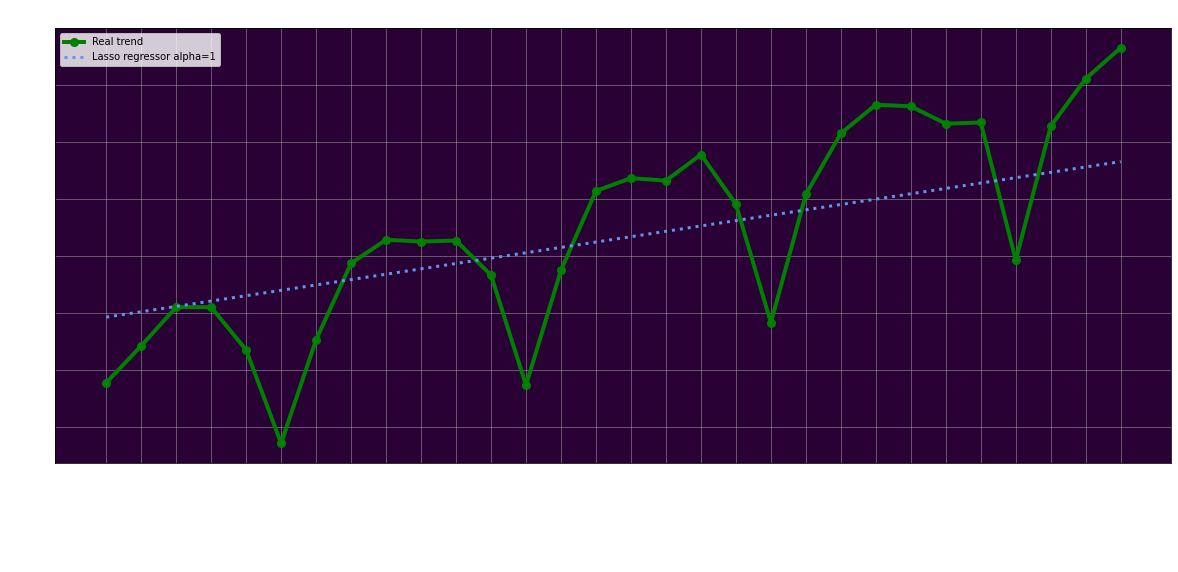

In [24]:
#plot selected data and model
plt.figure(figsize=(20,8))
ax = plt.axes()
ax.ticklabel_format(style='plain')
ax.set_facecolor('xkcd:very dark purple')
if (len(days) >= 100):
    plt.plot(xReal, yReal, color ='g', linewidth=4, label='Real trend')
    plt.plot(lassoRegressor.predict(xRealReshaped), color='cornflowerblue', linewidth = 3, label=f'Lasso regressor alpha={alphaL}', linestyle=":")
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
else: 
    if (len(days) >= 80):
        plt.xticks(rotation=90, fontsize=9, color='w')
        plt.plot(allDays, yReal, color ='g', linewidth=4, label='Real trend')
        plt.plot(allDays, lassoRegressor.predict(xRealReshaped), color='cornflowerblue', linewidth = 3, label=f'Lasso regressor alpha={alphaL}', linestyle=":")
    else:
        plt.xticks(rotation=90, fontsize=13, color='w')
        plt.plot(allDays, yReal, color ='g', linewidth=4, marker='o', markerfacecolor='g', markersize=8, label='Real trend')
        plt.plot(allDays, lassoRegressor.predict(xRealReshaped), color='cornflowerblue', linewidth = 3, label=f'Lasso regressor alpha={alphaL}', linestyle=":")
plt.yticks(color='w', fontsize=14)
plt.grid(axis= 'x', alpha = 0.6)
plt.grid(axis= 'y', alpha = 0.6)
plt.tick_params(axis='x', color='w')
plt.tick_params(axis='y', color='w')
plt.xlabel('Day', fontsize=15, color='w')
plt.ylabel(selectedFeatureDropdown.value, fontsize=15, color='w')
plt.title(str(selectedFeatureDropdown.value) + ' in Italy, for each day', fontsize=20, color='w')
plt.legend()
plt.show()

#### Ridge regression

Ridge regression is a method of estimating the coefficients of multiple-regression models in scenarios where independent variables are highly correlated.
<br>
Ridge regression was developed as a possible solution to the imprecision of least square estimators when linear regression models have some multicollinear (highly correlated) independent variables—by creating a ridge regression estimator (RR). 
<br>
This provides a more precise ridge parameters estimate, as its variance and mean square estimator are often smaller than the least square estimators previously derived.
<br>

By this previous definition ridge regression shoul be similar to lasso regression, but the formula are different.
At this link you can find a better explaination of the differences between the two: [Differences between Lasso & Ridge](https://www.geeksforgeeks.org/lasso-vs-ridge-vs-elastic-net-ml/)
<br>

Some ideas on how ridge regression works are provided at this link: [Ridge regression](https://towardsdatascience.com/ridge-regression-for-better-usage-2f19b3a202db).

In [25]:
alphaR=1
ridgeRegressor = Ridge(alphaR)
ridgeRegressor.fit(xTrainingReshaped, yTraining);
y_hat_Training = ridgeRegressor.predict(xTrainingReshaped)
y_hat_Validation = ridgeRegressor.predict(xValidationReshaped)

Here are provided the results for the ridge regressor.

In [26]:
# Training
print('Training R^2 score: ' + str(round(r2_score(yTraining, y_hat_Training),3)))
# Validation
print('Validation R^2 score: ' + str(round(r2_score(yValidation, y_hat_Validation),3)))

Training R^2 score: 0.603
Validation R^2 score: 0.838


The following plot shows both the ridge regressor, both the real trend.

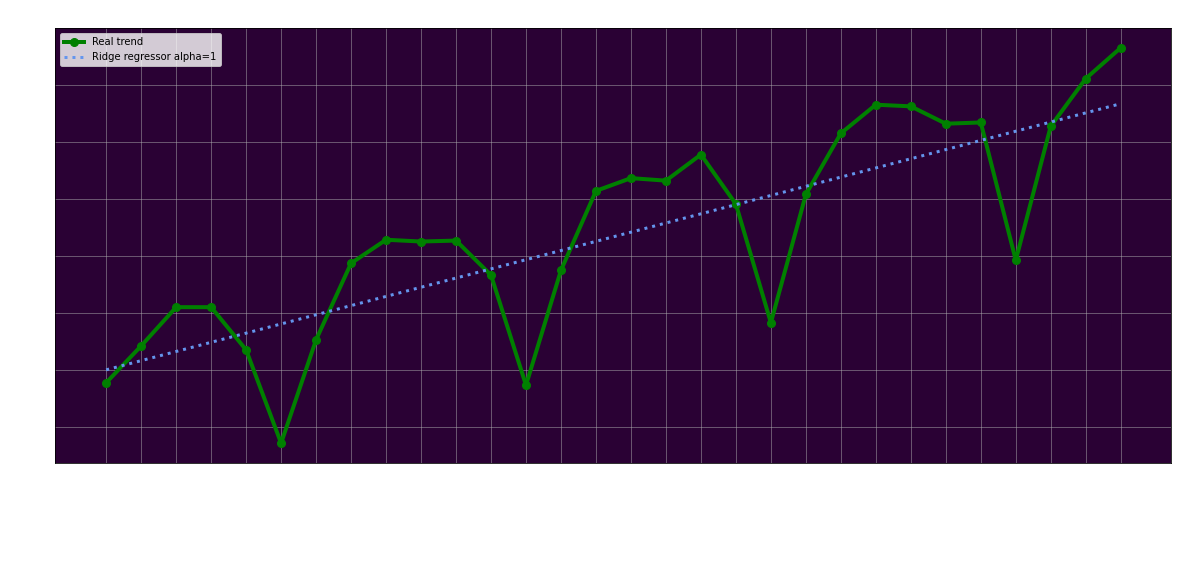

In [27]:
#plot selected data and model
plt.figure(figsize=(20,8))
ax = plt.axes()
ax.ticklabel_format(style='plain')
ax.set_facecolor('xkcd:very dark purple')
if (len(days) >= 100):
    plt.plot(xReal, yReal, color ='g', linewidth=4, label='Real trend')
    plt.plot(ridgeRegressor.predict(xRealReshaped), color='cornflowerblue', linewidth = 3, label=f'Ridge regressor alpha={alphaR}', linestyle=":")
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
else: 
    if (len(days) >= 80):
        plt.xticks(rotation=90, fontsize=9, color='w')
        plt.plot(allDays, yReal, color ='g', linewidth=4, label='Real trend')
        plt.plot(allDays, ridgeRegressor.predict(xRealReshaped), color='cornflowerblue', linewidth = 3, label=f'Ridge regressor alpha={alphaR}', linestyle=":")
    else:
        plt.xticks(rotation=90, fontsize=13, color='w')
        plt.plot(allDays, yReal, color ='g', linewidth=4, marker='o', markerfacecolor='g', markersize=8, label='Real trend')
        plt.plot(allDays, ridgeRegressor.predict(xRealReshaped), color='cornflowerblue', linewidth = 3, label=f'Ridge regressor alpha={alphaR}', linestyle=":")
plt.yticks(color='w', fontsize=14)
plt.grid(axis= 'x', alpha = 0.6)
plt.grid(axis= 'y', alpha = 0.6)
plt.tick_params(axis='x', color='w')
plt.tick_params(axis='y', color='w')
plt.xlabel('Day', fontsize=15, color='w')
plt.ylabel(selectedFeatureDropdown.value, fontsize=15, color='w')
plt.title(str(selectedFeatureDropdown.value) + ' in Italy, for each day', fontsize=20, color='w')
plt.legend()
plt.show()

#### Regression Splines

In order to overcome the disadvantages of polynomial regression, we can use an improved regression technique which, instead of building one model for the entire dataset, divides the dataset into multiple bins and fits each bin with a separate model. Such a technique is known as **Regression spline**.
<br>

Regression splines is one of the most important non linear regression techniques.
<br>
In polynomial regression, we generated new features by using various polynomial functions on the existing features which imposed a global structure on the dataset. 
<br>
To overcome this, we can divide the distribution of the data into separate portions and fit linear or low degree polynomial functions on each of these portions.
<br>
The points where the division occurs are called **Knots**. 
<br>
Functions which we can use for modelling each piece/bin are known as Piecewise functions.
<br>
There are various piecewise functions that we can use to fit these individual bins.
<br>
In this case we've used the [Natural Cubic Splines](https://towardsdatascience.com/numerical-interpolation-natural-cubic-spline-52c1157b98ac).
<br>

Some ideas on how regression splinen works are provided at this link: [Splines regression](https://www.analyticsvidhya.com/blog/2018/03/introduction-regression-splines-python-codes/).

<br>
Through the following slider you can choose the number of knots, even in this case the number of knots can be the overfitting or underfitting cause.

In [28]:
# Choose the number of regressor, for the spline curve
nknotsSlider = widgets.IntSlider(value=3, min=2, max=15, description='N° knots:')
interact(printSliderValue, sliderName=nknotsSlider);

interactive(children=(IntSlider(value=3, description='N° knots:', max=15, min=2), Output()), _dom_classes=('wi…

Create the spline model, given the number of knots.
<br>
The function cr must have as input even the degrees of freedom of the natural cubic spline, so remember that a natural cubic spline basis on K knots has K degrees of freedom.

In [29]:
# Generate spline basis with n degrees of freedom
x_basis = cr(xTraining, (nknotsSlider.value), constraints="center")
x_basis_2 = cr(xValidation, (nknotsSlider.value), constraints="center")
naturalSplineRegressor = LinearRegression().fit(x_basis, yTraining)
y_hat_Training = naturalSplineRegressor.predict(x_basis)

Show the results of our model.

In [30]:
# Training
print('Training R^2 score: ' + str(round(r2_score(yTraining, y_hat_Training),3)))
# Validation
print('Validation R^2 score: ' + str(round(r2_score(yValidation, y_hat_Validation),3)))

Training R^2 score: 0.61
Validation R^2 score: 0.838


Now we want to show in the same plot both the real trend, both the splines regressor, with the specific n knots value.

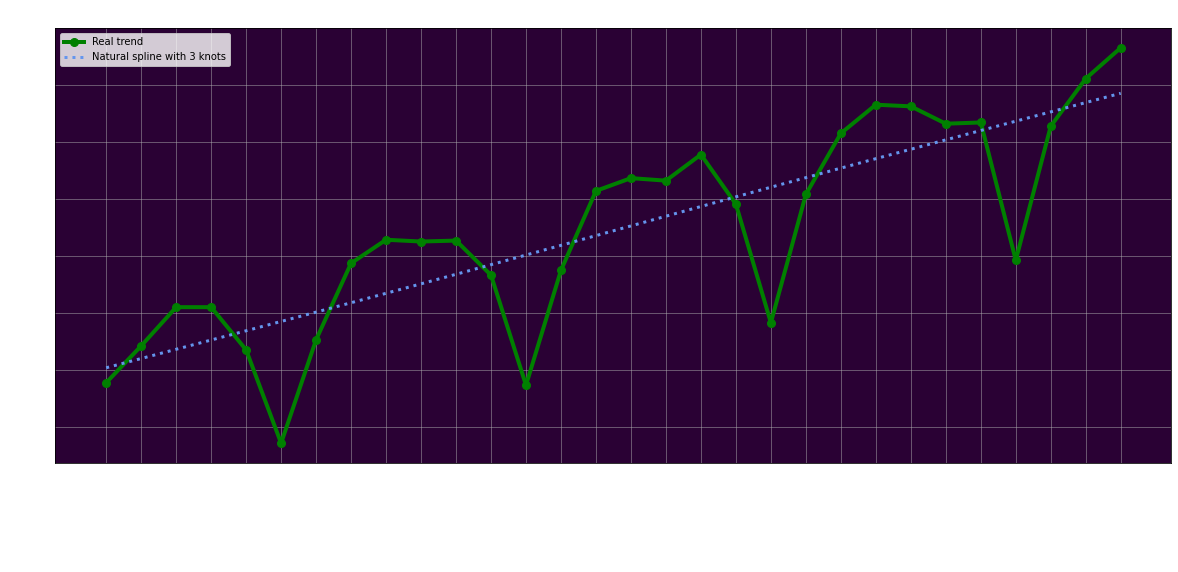

In [31]:
#plot selected data and model
plt.figure(figsize=(20,8))
ax = plt.axes()
ax.ticklabel_format(style='plain')
ax.set_facecolor('xkcd:very dark purple')
x_basis = cr(xReal, (nknotsSlider.value), constraints="center")
naturalSplineRegressor = LinearRegression().fit(x_basis, yReal)
if (len(days) >= 100):
    plt.plot(xReal, yReal, color ='g', linewidth=4, label='Real trend')
    plt.plot(naturalSplineRegressor.predict(x_basis), color='cornflowerblue', linewidth = 3, label=f"Natural spline with {nknotsSlider.value} knots", linestyle=":")
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
else: 
    if (len(days) >= 80):
        plt.xticks(rotation=90, fontsize=9, color='w')
        plt.plot(allDays, yReal, color ='g', linewidth=4, label='Real trend')
        plt.plot(allDays, naturalSplineRegressor.predict(x_basis), color='cornflowerblue', linewidth = 3, label=f"Natural spline with {nknotsSlider.value} knots", linestyle=":")
    else:
        plt.xticks(rotation=90, fontsize=13, color='w')
        plt.plot(allDays, yReal, color ='g', linewidth=4, marker='o', markerfacecolor='g', markersize=8, label='Real trend')
        plt.plot(allDays, naturalSplineRegressor.predict(x_basis), color='cornflowerblue', linewidth = 3, label=f"Natural spline with {nknotsSlider.value} knots", linestyle=":")
plt.yticks(color='w', fontsize=14)
plt.grid(axis= 'x', alpha = 0.6)
plt.grid(axis= 'y', alpha = 0.6)
plt.tick_params(axis='x', color='w')
plt.tick_params(axis='y', color='w')
plt.xlabel('Day', fontsize=15, color='w')
plt.ylabel(selectedFeatureDropdown.value, fontsize=15, color='w')
plt.title(str(selectedFeatureDropdown.value) + ' in Italy, for each day', fontsize=20, color='w')
plt.legend()
plt.show()

### Prediction <a id='prediction'></a>

<font color="#8FC965"><em>“Without big data analytics, companies are blind and deaf, wandering out onto the web like deer on a freeway.”</em>–Geoffrey Moore</font>
<br><br>

Once compared all the different models, we want to use the one that provided better results in validation.
<br>
So through this model we will predict the future values, in a specific date.
<br><br>
If we compare all the different models, **the one that works better on validation is the linear one**...so even if it is the simplest model, it is the one that works *better* in our case.
<br><br>
Obviously is difficult providing good results in a time that is far more than two weeks from now, for example it is really difficult forecasting the trend from now to three months, because a lot of things will occour.

<br>
Through the following widget you can choose the day on which you want to forecast the new positives value.

In [32]:
# in which day do you want to foresee future?
# default = 7 days
datePicker = widgets.DatePicker(value=(date.today()+timedelta(days=7)), description='Forsee date')
datePicker

DatePicker(value=datetime.date(2021, 12, 9), description='Forsee date')

In [33]:
# print the future prediction
if (datePicker.value < date.today()):
    print('Is useless to predict the trend in a day that is precedent from today')
else:
    if((datePicker.value >= (date.today()) + timedelta(days=45))):
       print('Be aware that real data will have a lot of discrepance from what the model precicts...\n')
    daysThatArePassingFromTheStart = (datePicker.value - date.today()).days + (len(df))
    predictionValue = (linearRegressor.predict([[daysThatArePassingFromTheStart + 1]])).item()
    if (applyLogScaleButton.value == True):
        result = math.exp(predictionValue)
    else:
        result = predictionValue
if (result > 0):
    print(result)
else: print(0)

18465.934838373534


Now we are interested on plotting the prediction on the general trend, starting from today until the selected date.

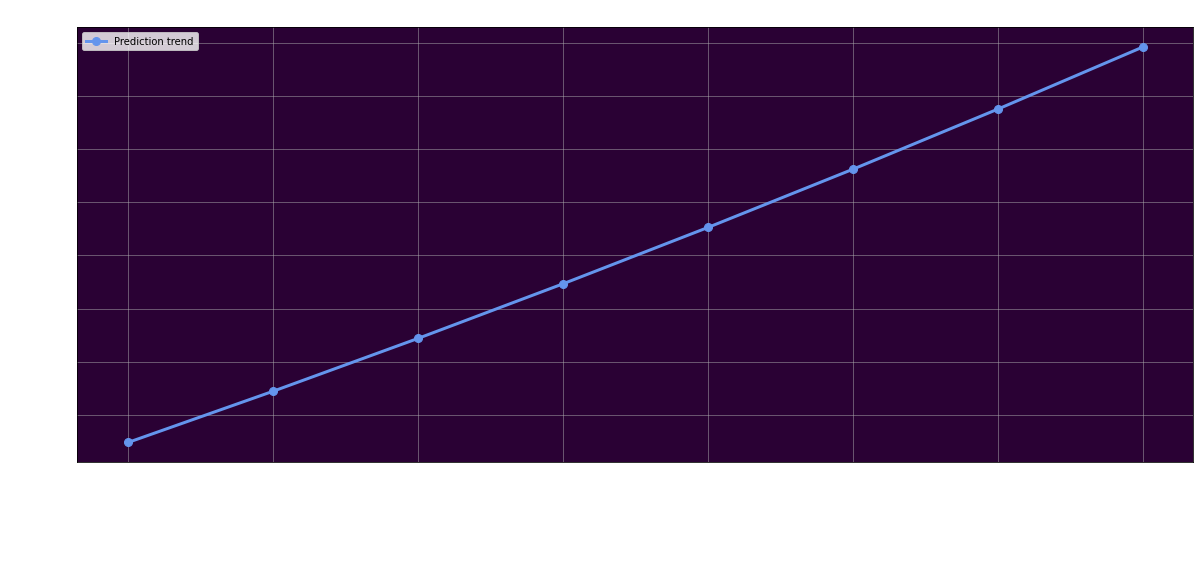

In [34]:
prediction = {}
for i in range(0, (datePicker.value - date.today()).days + 1):
    day = date.today() + timedelta(days=(i))
    day = str(day)
    result = (linearRegressor.predict([[i + len(df) + 1]])).item()
    if(applyLogScaleButton.value == True):
        result = math.exp((linearRegressor.predict([[i + len(df) + 1]])).item())
    if(result < 0): 
        result = 0
    prediction[day] = result
plt.figure(figsize=(20,8))
ax = plt.axes()
ax.ticklabel_format(style='plain')
ax.set_facecolor('xkcd:very dark purple')
if ((datePicker.value - date.today()).days >= 100):
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.plot(prediction.values(), color='cornflowerblue', linewidth = 3, label='Prediction trend')
else:
    if ((datePicker.value - date.today()).days >= 80):
        plt.xticks(rotation=90, fontsize=9, color='w')
        plt.plot(prediction.keys(), prediction.values(), color='cornflowerblue',marker='o', markerfacecolor='cornflowerblue', markersize=8, linewidth = 3, label='Prediction trend')
    else:
        plt.xticks(rotation=90, fontsize=13, color='w')
        plt.plot(prediction.keys(), prediction.values(), color='cornflowerblue',marker='o', markerfacecolor='cornflowerblue', markersize=8, linewidth = 3, label='Prediction trend')
plt.yticks(color='w', fontsize=14)
plt.grid(axis= 'x', alpha = 0.6)
plt.grid(axis= 'y', alpha = 0.6)
plt.tick_params(axis='x', color='w')
plt.tick_params(axis='y', color='w')
plt.xlabel('Day', fontsize=15, color='w')
plt.ylabel(selectedFeatureDropdown.value, fontsize=15, color='w')
plt.title(str(selectedFeatureDropdown.value) + ' in Italy, for each day (forecast)', fontsize=20, color='w')
plt.legend()
plt.show()

### Conclusions <a id='conclusions'></a>

<font color="#8FC965"><em>“Numbers have an important story to tell. They rely on you to give them a voice.”</em>–Stephen Few</font>
<br><br>

As far as we discussed previously, building a model with good, but not perfect, characteristics is essential in order to properly take decisions.
<br>
As you may may already tought, there are planty of applications in which statistical learning theory can be applied. 
<br><br>

If you want to see more on this argument here's a beatiful book: [An Introduction to Statistical Learning](https://web.stanford.edu/~hastie/ISLR2/ISLRv2_website.pdf).
Instead, if you want to see another of my project, related to this argument, here's the link:
[Gas consumption prediction](https://github.com/Amatofrancesco99/Gas_consumption-prediction).
<br><br><br>

[forthebadge](https://github.com/Amatofrancesco99)

[forthebadge](https://www.amatofrancesco.altervista.org)